# 2) 인공 신경망 훑어보기
## 3. 활성화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### (2) 계단 함수

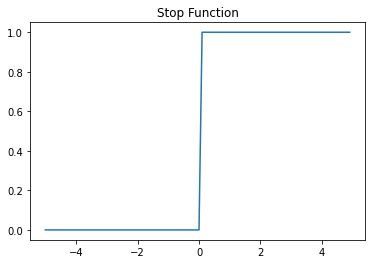

In [2]:
def step(x):
  return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)    # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Stop Function')
plt.plot(x, y)
plt.show()

### (3) 시그모이드 함수와 기울기 소실

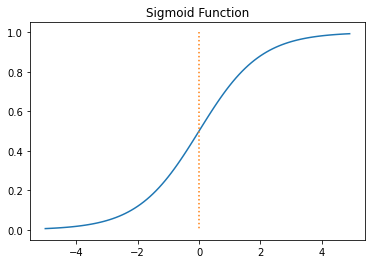

In [4]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':')    # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


### (4) 하이퍼볼릭탄젠트 함수

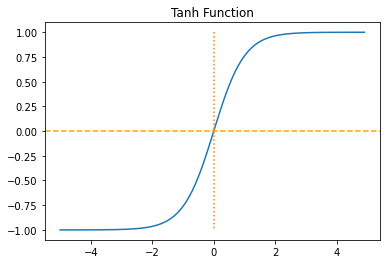

In [5]:
x = np.arange(-5.0, 5.0, 0.1)    # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
plt.title('Tanh Function')
plt.show()

### (5) 렐루 함수

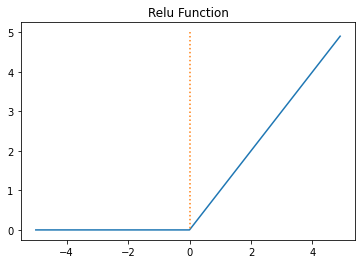

In [6]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

### (6) 리키 렐루

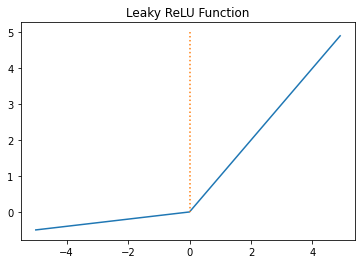

In [7]:
a = 0.1

def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### (7) 소프트맥스 함수

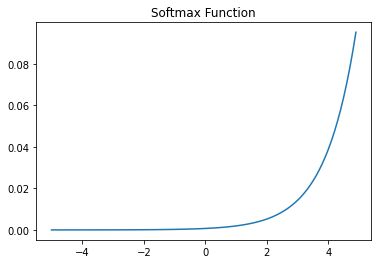

In [8]:
x = np.arange(-5.0, 5.0, 0.1)    # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 3) 행렬곱으로 이해하는 신경망
## 2. 행렬곱으로 순전파 이해하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

In [10]:
# 케라스에서는 .summary()를 사용하면 해당 모델에 존재하는 모든 매개변수를 확인할 수 있다
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


## 4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

TypeError: ignored

# 5) 과적합을 막는 방법들
## 4. 드롭아웃

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))    # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))    # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

# 7) 케라스 훑어보기
## 1. 전처리

In [23]:
# Tokenizer()
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = 'The earth is an awesome place live'

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = 'The earth is an great place live'
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 :", sequences)
print("단어 집합 :", tokenizer.word_index)

정수 인코딩 : [1, 2, 3, 4, 6, 7]
단어 집합 : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [24]:
# pad_sequence()
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')    # pre: 앞에 0을 채움, post:뒤에 0을 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

## 3. 모델링

In [26]:
# Sequential()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 임베딩 층을 추가하는 예시
model.add(Embedding(vocab_size, output_dim, input_length))
# 전결합층을 추가하는 예시
model.add(Dense(1, input_dim=3, activation='relu'))

NameError: ignored

# 8) 케라스의 함수형 API
## 2. Functional API로 만든 모델
### 1) 전결합 피드 포워드 신경망

In [34]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [35]:
inputs = Input(shape=(10,))

In [36]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

In [39]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(data, labels)

### 2) 선형회귀

In [33]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

x = [1,2,3,4,5,6,7,8,9]    # 공부하는 시간
y = [11,22,33,44,53,66,77,87,95]    # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 1s 582ms/step - loss: 3027.7554 - mse: 3027.7554
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 373.5643 - mse: 373.5643
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 46.9852 - mse: 46.9852
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 6.8013 - mse: 6.8013
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1.8563 - mse: 1.8563
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2471 - mse: 1.2471
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1714 - mse: 1.1714
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1614 - mse: 1.1614
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1594 - mse: 1.1594
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1585 - mse: 1.1585
Epoch 11/300
1/1 [==============================] - 0s 5ms/step -

### 3) 로지스틱 회귀

In [40]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

### 4) 다중 입력을 받는 모델

In [ ]:
# 최종 완성된 다중 입력, 다중 출력 모델의 예
model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])

In [42]:
# 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation='relu')(inputA)
x = Dense(8, activation='relu')(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation='relu')(inputB)
y = Dense(32, activation='relu')(y)
y = Dense(8, activation='relu')(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation='relu')(result)
z = Dense(1, activation='linear')(z)

model = Model(inputs=[x.input, y.input], outputs=z)

### 5) RNN 은닉층 사용하기

In [43]:
# 하나의 특성에 50개의 시점을 입력받는 모델
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50, 1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

In [ ]:
# 아래 두 코드는 동일한 의미이다

# 한줄
result = Dense(128)(input)

#두줄
dense = Dense(128)
result = dense(input)

# 9) 케라스 서브클래싱 API
## 1. 서브클래싱 API로 구현한 선형 회귀

In [44]:
import tensorflow as tf
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [47]:
model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300) 

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: ignored

# 10) 다층 퍼셉트론으로 텍스트 분류하기
## 2. 케라스의 texts_to_matrix() 이해하기

In [48]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [50]:
#text_to_matrix의 입력으로 texts를 넣고, 모드는' count'
print(tokenizer.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [51]:
# binary모드
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [52]:
#tfidf모드
print(tokenizer.texts_to_matrix(texts, mode='tfidf').round(2))    # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [54]:
# freq모드
print(tokenizer.texts_to_matrix(texts, mode='freq').round(2))

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


## 3. 20개 뉴스 그룹 데이터에 대한 이해

In [55]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [56]:
newsdata = fetch_20newsgroups(subset = 'train')    # train을 기재하면 훈련 데이터만 리턴한다

In [57]:
# 해당 데이터의 속성 확인
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [58]:
print("훈련용 샘플의 개수 : {}".format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [59]:
print("총 주제의 개수 : {}".format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [60]:
print("첫번째 샘플의 레이블 : {}".format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [61]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [62]:
print(newsdata.data[0])    #첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [63]:
# data로부터 데이터프레임을 생성하고, target열을 추가한 뒤에 상위 4개의 행 출력
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [65]:
# null값을 가진 샘플이 있는지 확인
data.isnull().values.any()

False

In [66]:
print("중복을 제외한 샘플의 수 : {}".format(data['email'].nunique()))
print("중복을 제외한 주제의 수 : {}".format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


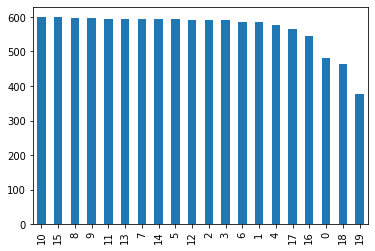

In [67]:
data['target'].value_counts().plot(kind='bar')

In [68]:
# 각 레이블이 몇 개 있는지 구체적인 수치로 확인
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [69]:
# 훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [70]:
# 케라스의 토크나이저 도구를 사용하여 전처리 진행
vocab_size = 10000
num_classes = 20

In [73]:
# 케라스 토크나이저로 전처리를 수행하는 함수

def prepare_data(train_data, test_data, mode):    # 전처리 함수
  tokenizer = Tokenizer(num_words = vocab_size)    # vocab_size개수만큼의 단어만 사용
  tokenizer.fit_on_texts(train_data)
  x_train = tokenizer.texts_to_matrix(train_data, mode=mode)    # 샘플 수 x vocab_size 크기의 행렬 생성
  x_test = tokenizer.texts_to_matrix(test_data, mode=mode)    # 샘플 수 x vocab_size 크기의 행렬 생성
  return x_train, x_test, tokenizer.index_word

In [74]:
x_train, x_test, index_to_word = prepare_data(train_email, test_email, 'binary')    # binary 모드로 변환
y_train = to_categorical(train_label, num_classes)    # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes)    # 원-핫 인코딩

In [76]:
print('훈련 샘플 본문의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [77]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## 4. 다층 퍼셉트론을 사용하여 텍스트 분류하기

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [79]:
# 다층 퍼셉트론 설계
def fit_and_evaluate(x_train, y_train, x_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
  return score[1]

In [80]:
modes = ['binary', 'count', 'tfidf', 'freq']    # 4개의 모드를 리스트에 저장

for mode in modes:    # 4개의 모드에 대해서 각각 아래의 작업을 반복
  x_train, x_test, _ = prepare_data(train_email, test_email, mode)    # 모드에 따라서 데이터를 전처리
  score = fit_and_evaluate(x_train, y_train, x_test, y_test)    # 모델을 훈련하고 평가
  print(mode+'모드의 테스트 정확도 :', score)

Epoch 1/5
80/80 [==============================] - 4s 43ms/step - loss: 2.2766 - accuracy: 0.3423 - val_loss: 0.9475 - val_accuracy: 0.8366
Epoch 2/5
80/80 [==============================] - 5s 60ms/step - loss: 0.8606 - accuracy: 0.7628 - val_loss: 0.4731 - val_accuracy: 0.8843
Epoch 3/5
80/80 [==============================] - 5s 57ms/step - loss: 0.4200 - accuracy: 0.8903 - val_loss: 0.3586 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 4s 44ms/step - loss: 0.2615 - accuracy: 0.9339 - val_loss: 0.3213 - val_accuracy: 0.9099
Epoch 5/5
80/80 [==============================] - 4s 45ms/step - loss: 0.1669 - accuracy: 0.9607 - val_loss: 0.3101 - val_accuracy: 0.9108
binary모드의 테스트 정확도 : 0.8308550119400024
Epoch 1/5
80/80 [==============================] - 4s 42ms/step - loss: 2.8118 - accuracy: 0.2296 - val_loss: 1.7334 - val_accuracy: 0.7182
Epoch 2/5
80/80 [==============================] - 3s 39ms/step - loss: 1.4903 - accuracy: 0.6190 - val_loss: 0.7430 - va